# Multi-Label Image Classification on Movies Poster using CNN

In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 516.2MB 24kB/s 


In [0]:
!git clone "https://github.com/laxmimerit/Movies-Poster_Dataset"

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 49.30 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing import image

from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.2.0


In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [0]:
path = (r"/content/drive/My Drive/Colab Notebooks/Data Folder/Movies-Poster_Dataset/train.csv")
data = pd.read_csv(path)
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
img_width = 250
img_height = 350

images_path = "/content/drive/My Drive/Colab Notebooks/Data Folder/Movies-Poster_Dataset/Images/"

X = []

for i in tqdm(range(data.shape[0])):
    path = images_path + data["Id"][i] + ".jpg"
    img = image.load_img(path,target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [57:35<00:00,  2.10it/s]


In [0]:
X.shape

(7254, 250, 350, 3)

"['Action', 'Comedy', 'Sci-Fi']"

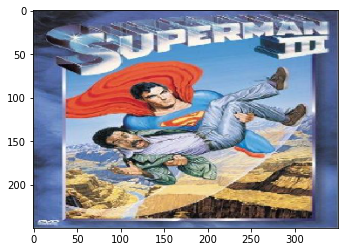

In [0]:
plt.imshow(X[10])
data["Genre"][10]

In [0]:
y = data.drop(["Id" , "Genre"] , axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15 , random_state =0  )
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6165, 250, 350, 3), (1089, 250, 350, 3), (6165, 25), (1089, 25))

# Build CNN

In [0]:
model = Sequential()

model.add(Conv2D(16,(3,3) , activation = "relu" , input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3) , activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3) , activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3) , activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Tricky : adding a sigmoid instead of softmax to predict multi-label 0,1
model.add(Dense(25,activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 248, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 122, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 86, 32)        0

In [0]:
model.compile(optimizer="adam", loss = "binary_crossentropy" , metrics=["accuracy"])
epochs = 5 
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/5
193/193 [==============================] - 135s 697ms/step - loss: 0.6905 - accuracy: 0.1075 - val_loss: 0.3829 - val_accuracy: 0.1901
Epoch 2/5
193/193 [==============================] - 131s 680ms/step - loss: 0.3156 - accuracy: 0.2623 - val_loss: 0.4152 - val_accuracy: 0.1901
Epoch 3/5
193/193 [==============================] - 135s 699ms/step - loss: 0.2620 - accuracy: 0.3066 - val_loss: 0.3020 - val_accuracy: 0.1901
Epoch 4/5
193/193 [==============================] - 137s 709ms/step - loss: 0.2526 - accuracy: 0.3077 - val_loss: 0.2626 - val_accuracy: 0.1901
Epoch 5/5
193/193 [==============================] - 137s 710ms/step - loss: 0.2459 - accuracy: 0.3192 - val_loss: 0.2539 - val_accuracy: 0.1901
